In [1]:
# ✅ 라이브러리 불러오기
from datasets import load_dataset
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
print("✅ 라이브러리 로드 완료")

✅ 라이브러리 로드 완료


In [2]:
# ✅ 데이터 로딩 및 전처리 파일 저장
data_pkl_path = Path('./data/student_data.pkl')
if not data_pkl_path.exists():
    print("🔽 HuggingFace에서 데이터 다운로드 및 전처리 중...")
    dataset = load_dataset("neuralsorcerer/student-performance")
    df = dataset['train'].to_pandas()
    cols = ['Gender', 'ParentalEducation', 'TestScore_Math', 'TestScore_Reading', 'TestScore_Science']
    df = df[cols].dropna()
    le_gender = LabelEncoder()
    le_parent = LabelEncoder()
    df['Gender'] = le_gender.fit_transform(df['Gender'])
    df['ParentalEducation'] = le_parent.fit_transform(df['ParentalEducation'])
    data_pkl_path.parent.mkdir(parents=True, exist_ok=True)
    df.to_pickle(data_pkl_path)
    print("✅ 전처리 완료 및 저장 완료")
else:
    print("📂 저장된 전처리 데이터 불러오기")
    df = pd.read_pickle(data_pkl_path)

🔽 HuggingFace에서 데이터 다운로드 및 전처리 중...
✅ 전처리 완료 및 저장 완료


In [3]:
# ✅ train/test split 후 저장 및 재사용
train_path = Path('./data/train.csv')
test_path = Path('./data/test.csv')
if not train_path.exists() or not test_path.exists():
    print("🔀 데이터 분할 중...")
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
    train_df.to_csv(train_path, index=False)
    test_df.to_csv(test_path, index=False)
    print("✅ 분할 저장 완료")
else:
    print("📂 저장된 split 데이터 불러오기")
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)

🔀 데이터 분할 중...
✅ 분할 저장 완료


c:\Users\sksxk\OneDrive\python\noob\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sksxk\OneDrive\python\noob\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sksxk\OneDrive\python\noob\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sksxk\OneDrive\python\noob\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sksxk\OneDrive\python\noob\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLA

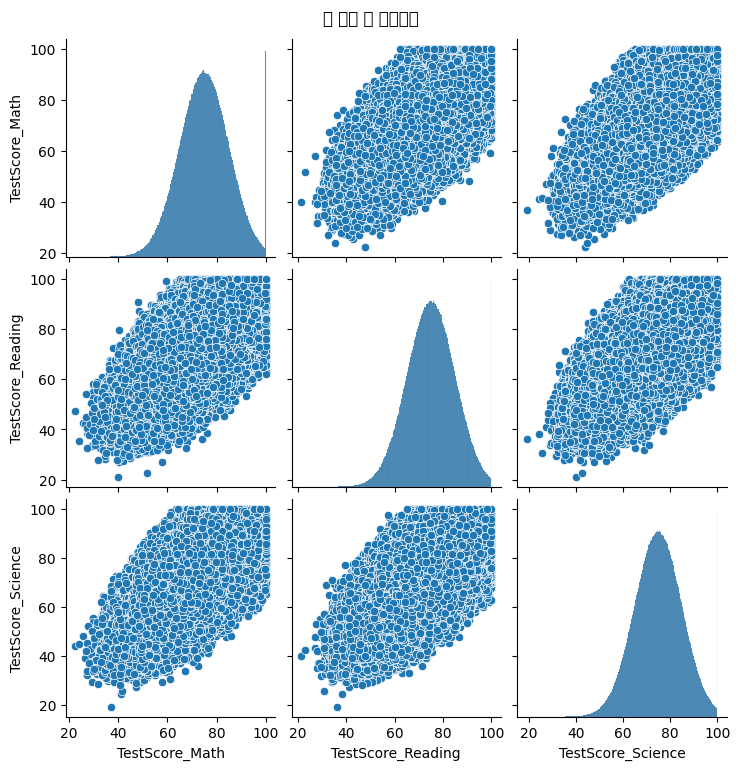

In [4]:
# ✅ 시각화: 수치 변수들의 상관관계
sns.pairplot(train_df[['TestScore_Math', 'TestScore_Reading', 'TestScore_Science']])
plt.suptitle("📊 점수 간 상관관계", y=1.02)
plt.show()

In [5]:
# ✅ 회귀 분석: 읽기기 점수 예측
X_train = train_df[['TestScore_Math', 'TestScore_Reading', 'Gender', 'ParentalEducation']]
y_train = train_df['TestScore_Science']
X_test = test_df[['TestScore_Math', 'TestScore_Reading', 'Gender', 'ParentalEducation']]
y_test = test_df['TestScore_Science']

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}")

MSE: 41.93
R²: 0.58


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18084\3379092468.py:9: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18084\3379092468.py:9: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18084\3379092468.py:9: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18084\3379092468.py:9: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18084\3379092468.py:9: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18084\3379092468.py

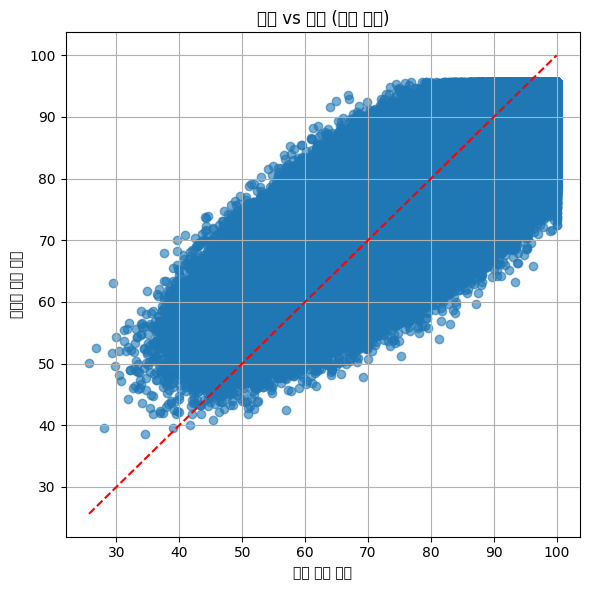

In [6]:
# ✅ 예측 결과 시각화
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("실제 과학 점수")
plt.ylabel("예측된 과학 점수")
plt.title("예측 vs 실제 (과학 점수)")
plt.grid(True)
plt.tight_layout()
plt.show()